In [ ]:
!pip install datasets nltk -q

In [ ]:
pip install datasets

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf
from datasets import load_dataset
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
nltk.download("stopwords")
STOPWORDS=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
ds=load_dataset("AmaanP314/youtube-comment-sentiment")# lolads the dataset upload by "AmaanP314 in Hugging Face
df=ds['train'].to_pandas() #Converts to pandas dataframe

README.md: 0.00B [00:00, ?B/s]

youtube-comments-sentiment.csv:   0%|          | 0.00/296M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1032225 [00:00<?, ? examples/s]

In [4]:
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2


In [5]:
df=df.rename(columns={"CommentText":"text","Sentiment":"label"})

In [ ]:
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,text,label,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2


## EDA(Exploratory Data Analysis)

In [6]:
print(df.shape)

(1032225, 12)


In [7]:
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,text,label,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2


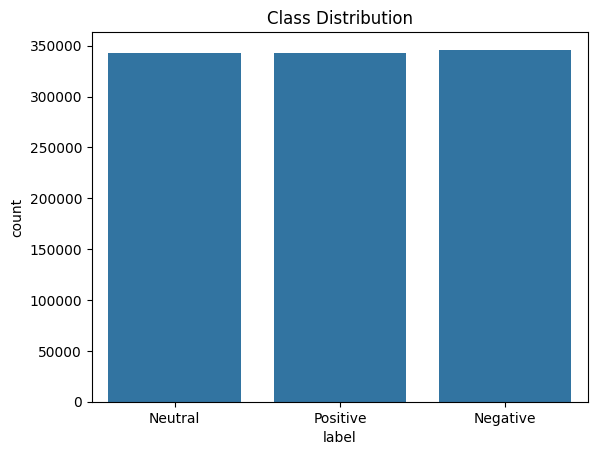

In [ ]:
sns.countplot(x="label",data=df)
plt.title("Class Distribution")
plt.show()

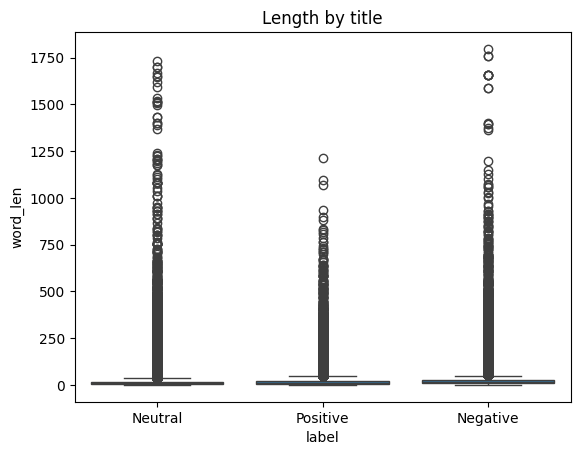

In [8]:
df['word_len']=df['text'].str.split().apply(len)#Counts words in each comment.
sns.boxplot(x='label',y='word_len',data=df)
plt.title("Length by title")
plt.show()

In [9]:
df_word_len_stats = df.groupby('label')['word_len'].describe()
display(df_word_len_stats)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Negative,346075.0,22.406334,33.250525,1.0,8.0,14.0,25.0,1796.0
Neutral,342833.0,16.464109,30.558629,0.0,5.0,10.0,18.0,1732.0
Positive,343317.0,18.719350,25.529019,1.0,6.0,12.0,22.0,1212.0


Based on the descriptive statistics, we can infer the following insights from the boxplot:

*   **Comment Length Distribution by Sentiment**: We can observe the average word length and its spread for each sentiment category (Positive, Negative, Neutral).
*   **Median Word Length**: The `50%` row (median) indicates the typical word length for comments in each sentiment. Differences in medians suggest that certain sentiments might generally be expressed with longer or shorter comments.
*   **Interquartile Range (IQR)**: The difference between the `75%` and `25%` values shows the spread of the middle 50% of the word lengths. A larger IQR indicates a wider variation in comment lengths for that sentiment.
*   **Outliers**: The `max` values, especially when significantly larger than the `75%` quartile, could indicate the presence of unusually long comments, which might be represented as outliers in the boxplot.
*   **Comparison Across Sentiments**: By comparing these statistics across 'Positive', 'Negative', and 'Neutral' labels, we can identify if there's a tendency for a particular sentiment to be associated with significantly longer or shorter comments, or if one sentiment category has a much wider range of comment lengths than others.

## Advanced Cleaning Pipeline

In [10]:
def clean_text(t):
   t=t.lower()#Convert to lowercase
   t=re.sub(r"https\S+","",t)
   t = re.sub(r"@\w+","",t) #Find @mentions → replace with nothing → remove them
   t = re.sub(r"[^a-z\s]"," ",t) #it removes punctuation, emojis, symbols, numbers, and special characters. anything negation of a-z and \s stands for whitespaces,tabs,newlines etc
   tokens=[w for w in t.split() if w not in STOPWORDS and len(w)>2]#Removes:stopwords,very short words
   return " ".join(tokens)

In [11]:
df['clean']=df['text'].apply(clean_text)
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,text,label,Likes,Replies,PublishedAt,CountryCode,CategoryID,word_len,clean
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1,6,anyone know movie
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,13,fact holding back equally aggressive
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27,5,waiting next video
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,91,thanks great video understand continues accesi...
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,19,good person helping good people america exception


In [12]:
df = df[df["clean"].str.split().apply(len) > 3]

In [ ]:
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,text,label,Likes,Replies,PublishedAt,CountryCode,CategoryID,word_len,clean
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,13,fact holding back equally aggressive
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,91,thanks great video understand continues accesi...
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,19,good person helping good people america exception
6,UgzJ-2rV0-YNPyMj0u14AaABAg,X4wNLFrv9Co,Which one will you choose to use the cola keyc...,@JasmineHatchel-c3c,UCHvnyO2K7-1oXXdWQh0510g,Number two because it looks the best with it,Positive,0,0,2025-01-10 06:00:19,US,28,9,number two looks best
7,UgwuFh4s9cHu3dHrPqJ4AaABAg,sKniMxl9zwo,Trump’s Reaction During ‘Abuse of Power’ Says ...,@StaceyBrown-h6o,UCzTaRiUaLcaLD9I0l2tCBCA,Thank God we don’t have to listen to his drive...,Positive,0,0,2025-01-14 01:24:48,IE,25,11,thank god listen drivel anymore


In [ ]:
df.shape

(745062, 14)

## Feature Engineering

In [13]:
df['exclaim']=df['text'].str.count("!")
df['question']=df['text'].str.count("\?")
#caps_ratio = uppercase_count / (text_length + 1)
# High caps_ratio usually indicates:
# SHOUTING
# Toxic or aggressive text
# Spam or fake promotion so we have to analyse it These are behavioral sentiment signals.

df['caps_ratio']=df['text'].apply(lambda x:sum(c.isupper() for c in x)/len(x)+1)

In [ ]:
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,text,label,Likes,Replies,PublishedAt,CountryCode,CategoryID,word_len,clean,exclaim,question,caps_ratio
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,13,fact holding back equally aggressive,0,0,1.012658
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,91,thanks great video understand continues accesi...,0,4,1.028689
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,19,good person helping good people america exception,0,0,1.074468
6,UgzJ-2rV0-YNPyMj0u14AaABAg,X4wNLFrv9Co,Which one will you choose to use the cola keyc...,@JasmineHatchel-c3c,UCHvnyO2K7-1oXXdWQh0510g,Number two because it looks the best with it,Positive,0,0,2025-01-10 06:00:19,US,28,9,number two looks best,0,0,1.022727
7,UgwuFh4s9cHu3dHrPqJ4AaABAg,sKniMxl9zwo,Trump’s Reaction During ‘Abuse of Power’ Says ...,@StaceyBrown-h6o,UCzTaRiUaLcaLD9I0l2tCBCA,Thank God we don’t have to listen to his drive...,Positive,0,0,2025-01-14 01:24:48,IE,25,11,thank god listen drivel anymore,0,0,1.036364


## Label Encoding

In [14]:
#Dictionary mapping
# label_map={"negative":0,"neutral":1,"positive":2}
# df['y']=df['label'].str.map(label_map)

#using Label Enoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['y']=le.fit_transform(df['label'])


In [ ]:
df.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,text,label,Likes,Replies,PublishedAt,CountryCode,CategoryID,word_len,clean,exclaim,question,caps_ratio,y
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,13,fact holding back equally aggressive,0,0,1.012658,2
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,91,thanks great video understand continues accesi...,0,4,1.028689,1
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,19,good person helping good people america exception,0,0,1.074468,2
6,UgzJ-2rV0-YNPyMj0u14AaABAg,X4wNLFrv9Co,Which one will you choose to use the cola keyc...,@JasmineHatchel-c3c,UCHvnyO2K7-1oXXdWQh0510g,Number two because it looks the best with it,Positive,0,0,2025-01-10 06:00:19,US,28,9,number two looks best,0,0,1.022727,2
7,UgwuFh4s9cHu3dHrPqJ4AaABAg,sKniMxl9zwo,Trump’s Reaction During ‘Abuse of Power’ Says ...,@StaceyBrown-h6o,UCzTaRiUaLcaLD9I0l2tCBCA,Thank God we don’t have to listen to his drive...,Positive,0,0,2025-01-14 01:24:48,IE,25,11,thank god listen drivel anymore,0,0,1.036364,2


In [ ]:
df.isnull().sum()

,0
CommentID,0
VideoID,0
VideoTitle,0
AuthorName,499
AuthorChannelID,0
text,0
label,0
Likes,0
Replies,0
PublishedAt,0


In [15]:
df['AuthorName']=df['AuthorName'].fillna("Unknown Author")


In [ ]:
df.isnull().sum()

In [ ]:
print(le.classes_)

['Negative' 'Neutral' 'Positive']


In [ ]:
df['y'].isnull().sum()

## Train Test Split

In [ ]:
df['clean']

,clean
1,fact holding back equally aggressive
3,thanks great video understand continues accesi...
4,good person helping good people america exception
6,number two looks best
7,thank god listen drivel anymore
...,...
1032218,hate adidas done good also believe stick nike
1032219,read peoples comments hate ban laugh
1032220,recommendations build top add complexity impro...
1032221,act foolishly receive foolish rewards


In [ ]:
df['y']

,y
1,2
3,1
4,2
6,2
7,2
...,...
1032218,0
1032219,1
1032220,2
1032221,0


In [16]:
train_text,test_text,y_train,y_test=train_test_split(df['clean'],df['y'],test_size=0.2,stratify=df['y'])

## Tokenization

The step in tokenisation is text → tokens → numbers → equal-length arrays as the neural networks only understands numbers → tensors → matrices

the tokenizer performs the following say an example:

"This video is good"

→ ["this","video","is","good"]

→ [12, 87, 5, 301]

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
VOCAB_SIZE=20000#Only keep the top 20,000 most frequent words
max_len=120
EMB_DIM=100
tokenizer=Tokenizer(
    num_words=VOCAB_SIZE,
    oov_token="<OOV>"#OOV = Out Of Vocabulary when it get a word which is not pressent in traning then without oov it will be dropped With OOV → replaced with special token ID
)
tokenizer.fit_on_texts(train_text)#This is where tokenizer learns vocabulary.
X_train_seq=tokenizer.texts_to_sequences(train_text)# it converts "this video is amazing" to [10, 4, 7, 201]
X_test_seq=tokenizer.texts_to_sequences(test_text)#Now text is numeric.



As the Lengths differ → problem for neural networks.Neural networks

need:fixed-size input tensors so we use Padding. Padding makes all sequences

same length.We chose MAXLEN = 120. Every comment becomes length 120.

"good" → [5]

"This is very very good video" → [10,7,23,23,5,4]

Case A — Short text
[10, 4, 7]


Becomes:

[0,0,0,0,...,10,4,7]


Zeros added = padding token.

In [18]:
X_train=pad_sequences(X_train_seq,maxlen=max_len,padding='post')
X_test=pad_sequences(X_test_seq,maxlen=max_len,padding='post')

In [19]:
#They convert the class labels in y_train and y_test into one-hot encoded vectors.
# If your dataset has 3 classes (0, 1, 2), then:
# Label 0 becomes → [1, 0, 0]
# Label 1 becomes → [0, 1, 0]
# Label 2 becomes → [0, 0, 1] because Neural networks trained with categorical crossentropy expect the output labels to be one-hot vectors, not single integers.
y_train=tf.keras.utils.to_categorical(y_train,3)
y_test=tf.keras.utils.to_categorical(y_test,3)

In [20]:
embedding_index = {}

with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = vector

print("Loaded %s word vectors." % len(embedding_index))

Loaded 400000 word vectors.


In [23]:
embedding_matrix = np.zeros((VOCAB_SIZE, EMB_DIM))

for word, i in tokenizer.word_index.items():
    if i < VOCAB_SIZE:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (20000, 100)


## Training Helper

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
def train_model(model,name):
  model.compile(
      loss='categorical_crossentropy',
      optimizer=Adam(learning_rate=0.0005),
      metrics=['accuracy']
  )
  early=EarlyStopping(patience=2,restore_best_weights=True)#This is an anti-overfitting safeguard.
  '''EarlyStopping stops your training early if the model is no longer improving.
  Meaning:
If your model keeps getting better, training continues.
If your model stops improving, training stops automatically.
It prevents overfitting and saves time.
Without it:
Your model may keep training even when it’s not learning anything new.
It may start to overfit (memorize training data but perform worse on test data).
You waste time training extra epochs that don't help.
With EarlyStopping:
Training halts once improvement stops.
The model restores the best weights found (because of restore_best_weights=True).
Meaning of patience=2
"Wait for 2 epochs even if there is no improvement.
If still no improvement → STOP."
  '''
  history=model.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=8,
      batch_size=256,
      callbacks=[early],
      verbose=1
  )
  loss,acc=model.evaluate(X_test,y_test)
  print(f"\n{name} Accuracy={acc:.4f}")
  return history,acc

## Model 1 — ANN Perceptron

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Dense, Embedding,LSTM,Bidirectional,GlobalAveragePooling1D,Dropout,Layer
)
from tensorflow.keras.models import Sequential
def build_ann():
  model=Sequential([
      Embedding(VOCAB_SIZE,EMB_DIM, weights=[embedding_matrix],input_length=max_len,trainable=True,mask_zero=True), #mask_zero basically ignores Ignores padding zeros Improves RNN/BiLSTM learning
      GlobalAveragePooling1D(),
      Dense(128,activation='relu'),
      Dropout(0.4),
      Dense(64,activation='relu'),
      Dropout(0.3),
      Dense(3,activation='softmax')
  ])
  return model
ann_model=build_ann()
ann_hist,ann_acc=train_model(ann_model,"ANN")

Epoch 1/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5594 - loss: 0.9205 - val_accuracy: 0.6488 - val_loss: 0.7883
Epoch 2/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6547 - loss: 0.7840 - val_accuracy: 0.6629 - val_loss: 0.7619
Epoch 3/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6754 - loss: 0.7473 - val_accuracy: 0.6667 - val_loss: 0.7543
Epoch 4/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6853 - loss: 0.7262 - val_accuracy: 0.6680 - val_loss: 0.7510
Epoch 5/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6911 - loss: 0.7143 - val_accuracy: 0.6680 - val_loss: 0.7508
Epoch 6/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6954 - loss: 0.7032 - val_accuracy: 0.6690 - val_loss: 0.7507
Epoch 7/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6991 - loss: 0.6954 - val_accuracy: 0.6693 - val_loss: 0.7514
Epoch 8/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7037 - loss: 0.6847 - val_ac

## Model 2 — Simple RNN

In [43]:
from tensorflow.keras.layers import (
    Dense, Embedding,SimpleRNN,LSTM,Bidirectional,GlobalAveragePooling1D,Dropout,Layer,GlobalMaxPooling1D
)
def build_rnn():
  model=Sequential([
      Embedding(VOCAB_SIZE,EMB_DIM,weights=[embedding_matrix],input_length=max_len,trainable=True,mask_zero=True),
      SimpleRNN(128),#It processes text one word at a time while remembering previous words.
      #64 = number of hidden units.It means: The model will summarize the whole sentence into a 64-dimensional vector.So the entire 120-word comment is compressed into a 64-number summary.
      Dropout(0.4),
      Dense(64, activation='relu'),
      Dropout(0.3),
      Dense(3,activation='softmax')

  ])
  return model
rnn_model=build_rnn()
rnn_history,rnn_acc=train_model(rnn_model,"Simple RNN")

Epoch 1/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.5408 - loss: 0.9543 - val_accuracy: 0.6358 - val_loss: 0.8141
Epoch 2/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.6487 - loss: 0.7946 - val_accuracy: 0.6574 - val_loss: 0.7703
Epoch 3/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.6688 - loss: 0.7573 - val_accuracy: 0.6633 - val_loss: 0.7595
Epoch 4/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.6799 - loss: 0.7348 - val_accuracy: 0.6646 - val_loss: 0.7587
Epoch 5/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.6858 - loss: 0.7202 - val_accuracy: 0.6649 - val_loss: 0.7599
Epoch 6/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.6909 - loss: 0.7098 - val_accuracy: 0.6632 - val_loss: 0.7622
4657/4657 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6636 - loss: 0.7606

Simple RNN Accuracy=0.6651


## Model 3 — BiLSTM(Bidirectional LSTM)

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Dense, Embedding,LSTM,Bidirectional,GlobalAveragePooling1D,Dropout,Layer
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Embedding,SimpleRNN,LSTM,Bidirectional,GlobalAveragePooling1D,Dropout,Layer,GlobalMaxPooling1D
)
# Model 3 — BiLSTM (Target Best Model)
def build_bilstm():
  model=  Sequential([
      Embedding(VOCAB_SIZE,
                EMB_DIM,
                weights=[embedding_matrix],
                input_length=max_len,
                trainable=False,
                mask_zero=True),
      Bidirectional(LSTM(128,return_sequences=True)), # formaward lstm+bcakward lstm (each has 128 units so 128+128=256 ) so output becomes (batch_size, MAX_LEN, 256)
      GlobalMaxPooling1D(),#Pooling reduces sequence dimension. It selects the maximum value across time steps.It becomes (batch_size, 256) Max pooling is used Because strong sentiment words "amazing","terrible",
      #produce high activations. Max pooling captures the strongest signal.
      Dropout(0.4),#During training:Randomly drops 50% neurons,Prevents overfitting,Forces model to generalize,Without dropout, BiLSTM often memorizes.
      Dense(64,activation='relu'), #Adds Non-linearity,Feature interaction,Better decision boundary Shape becomes=(batch_size, 64)
      Dropout(0.3),#Another regularization step.
# LSTM(64) means:

# LSTM = Long Short-Term Memory network
# 64 = number of hidden units (memory size)
# 👉 Reads the sentence from left to right
# 👉 Remembers important information
# 👉 Outputs a 64-dimensional vector summarizing the sentence
# LSTM reads → Left to Right I → did → not → like → this → movie  But sometimes meaning depends on future words. If model reads only left to right, it processes:
# not → good But what if the important word is at the end? To fix this, we use: Bidirectional 1 Forward LSTM+1 Backward LSTM movie → this → like → not → did → I
# Then it combines both understandings.

      Dense(3,activation='softmax')

  ])
  return model


In [36]:

def train_model_bilstm(model):
  model.compile(
      optimizer=Adam(learning_rate=0.0005),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
      # Early Stopping Callback
  early_stop = EarlyStopping(
        monitor='val_loss',          # stops if validation loss doesn’t improve for 3 epochs
        patience=2,                  # Wait 2 epochs without improvement stops if validation loss doesn’t improve for 2 epochs
        restore_best_weights=True,   # Go back to best weights prevents overfitting at the end
        verbose=1
    )
  history=model.fit(
      X_train,
      y_train,
      validation_split=0.2,
      epochs=8,
      batch_size=256,
      callbacks=[early_stop],
      verbose=1
  )
  loss,acc=model.evaluate(X_test,y_test)
  print(f"\nTest Accuracy: {acc:.4f}")
  return model, history, acc


In [37]:
bilstm_model=build_bilstm()
bilstm_model,bilstm_history,bilstm_acc=train_model_bilstm(bilstm_model)

Epoch 1/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.5628 - loss: 0.9189 - val_accuracy: 0.6186 - val_loss: 0.8286
Epoch 2/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6208 - loss: 0.8331 - val_accuracy: 0.6355 - val_loss: 0.8028
Epoch 3/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.6341 - loss: 0.8091 - val_accuracy: 0.6442 - val_loss: 0.7906
Epoch 4/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.6428 - loss: 0.7931 - val_accuracy: 0.6493 - val_loss: 0.7794
Epoch 5/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6507 - loss: 0.7814 - val_accuracy: 0.6496 - val_loss: 0.7760
Epoch 6/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6543 - loss: 0.7731 - val_accuracy: 0.6542 - val_loss: 0.7681
Epoch 7/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6589 - loss: 0.7650 - val_accuracy: 0.6561 - val_loss: 0.7656
Epoch 8/8
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6625 - loss: 0

In [38]:
print("Train accuracy:", bilstm_history.history['accuracy'][-1])
print("Validation accuracy:", bilstm_history.history['val_accuracy'][-1])

Train accuracy: 0.6624436974525452
Validation accuracy: 0.6581327319145203


In [44]:
results=pd.DataFrame({
    "Model":['ANN Perceptron','Simple RNN','BiLSTM'],
    "Accuracy":[ann_acc,rnn_acc,bilstm_acc]
})
print(results.sort_values("Accuracy", ascending=False))


            Model  Accuracy
0  ANN Perceptron  0.670056
1      Simple RNN  0.665063
2          BiLSTM  0.660741


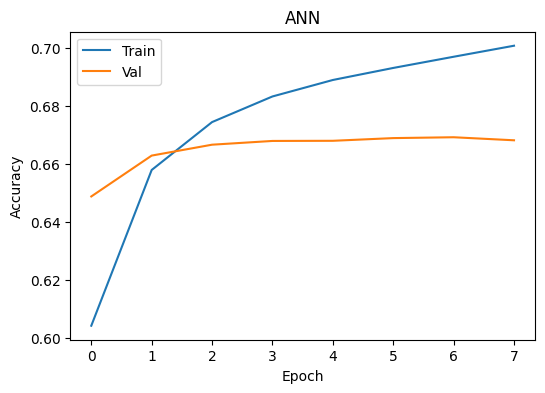

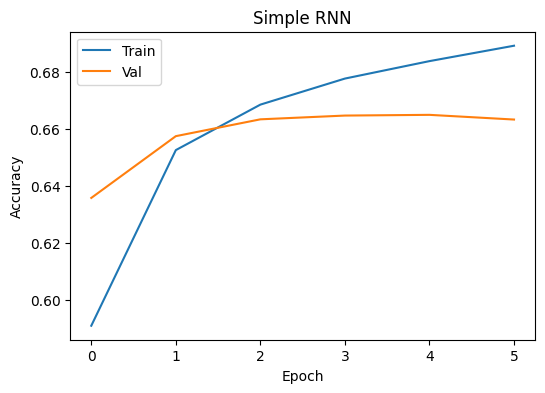

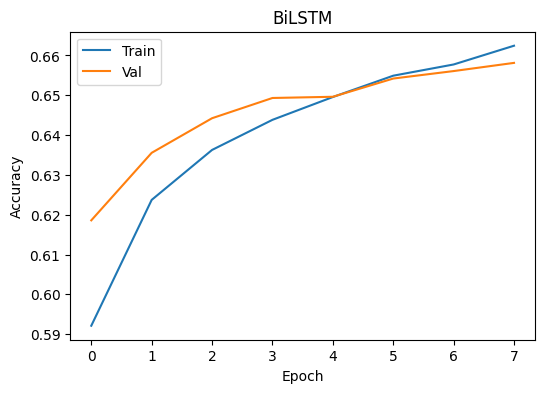

In [45]:
def plot_history(history, title):
  plt.figure(figsize=(6,4))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'])
  plt.show()
plot_history(ann_hist, "ANN")
plot_history(rnn_history, "Simple RNN")
plot_history(bilstm_history, "BiLSTM")


## Correct Confusion Matrix + Classification Report

4657/4657 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step


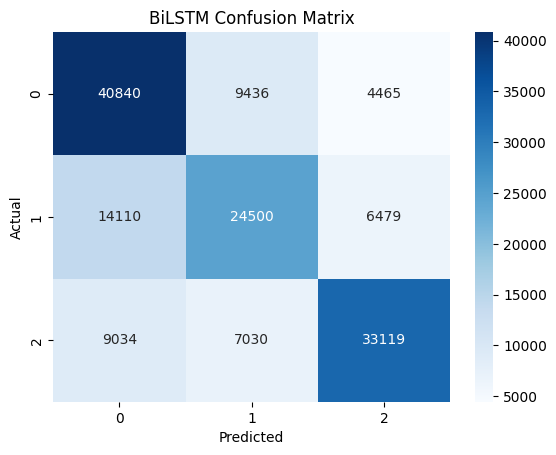

              precision    recall  f1-score   support

           0       0.64      0.75      0.69     54741
           1       0.60      0.54      0.57     45089
           2       0.75      0.67      0.71     49183

    accuracy                           0.66    149013
   macro avg       0.66      0.65      0.66    149013
weighted avg       0.66      0.66      0.66    149013



In [46]:
y_pred_probs = bilstm_model.predict(X_test)
# Convert to class labels
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("BiLSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Classification Report
print(classification_report(y_true, y_pred))

4657/4657 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


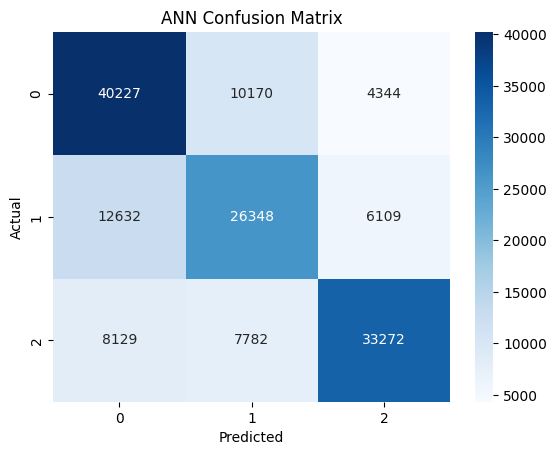

              precision    recall  f1-score   support

           0       0.66      0.73      0.70     54741
           1       0.59      0.58      0.59     45089
           2       0.76      0.68      0.72     49183

    accuracy                           0.67    149013
   macro avg       0.67      0.67      0.67    149013
weighted avg       0.67      0.67      0.67    149013



In [56]:
y_pred_probs = ann_model.predict(X_test)
# Convert to class labels
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Classification Report
print(classification_report(y_true, y_pred))

4657/4657 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step


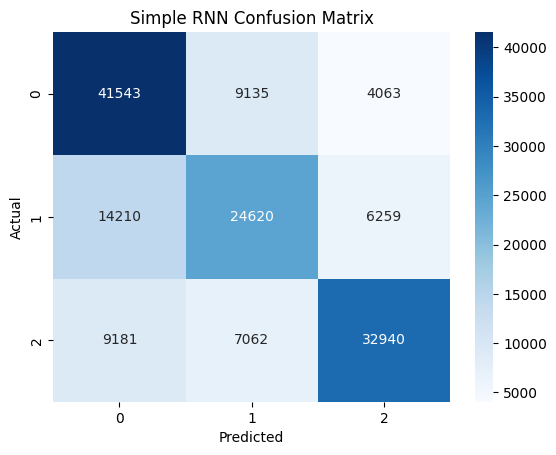

              precision    recall  f1-score   support

           0       0.64      0.76      0.69     54741
           1       0.60      0.55      0.57     45089
           2       0.76      0.67      0.71     49183

    accuracy                           0.67    149013
   macro avg       0.67      0.66      0.66    149013
weighted avg       0.67      0.67      0.66    149013



In [57]:
y_pred_probs = rnn_model.predict(X_test)
# Convert to class labels
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Simple RNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Classification Report
print(classification_report(y_true, y_pred))

In [49]:
def predict_sentiment(text):
    # Clean text same way as training
    cleaned = clean_text(text)

    # Convert to sequence
    seq = tokenizer.texts_to_sequences([cleaned])

    # Pad
    padded = pad_sequences(seq, maxlen=max_len, padding='post')

    # Predict
    probs = ann_model.predict(padded)
    class_index = probs.argmax(axis=1)[0]

    # Convert numeric label back to original label
    label = le.inverse_transform([class_index])[0]

    return label

In [53]:
test_sentences = [
    "This movie was absolutely fantastic!",
    "Worst video ever, I hated it.",
    "It was okay, nothing special.",
    "Amazing content, keep it up!",
    "Terrible experience, very disappointing."
]

for sentence in test_sentences:
    print(f"Text: {sentence}")
    print("Predicted:", predict_sentiment(sentence))
    print("-"*50)

Text: This movie was absolutely fantastic!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: Positive
--------------------------------------------------
Text: Worst video ever, I hated it.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted: Negative
--------------------------------------------------
Text: It was okay, nothing special.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted: Negative
--------------------------------------------------
Text: Amazing content, keep it up!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted: Positive
--------------------------------------------------
Text: Terrible experience, very disappointing.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: Negative
--------------------------------------------------


In [54]:
ann_model.save("final_ann_youtube_sentiment.h5")

In [55]:
import pickle
with open('tokenizer.pkl','wb') as f:
  pickle.dump(tokenizer,f)
#save label encoder
with open('label_encoder.pkl','wb') as f:
  pickle.dump(le,f)

In [ ]:
df

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,text,label,Likes,Replies,PublishedAt,CountryCode,CategoryID,word_len,clean,exclaim,question,caps_ratio,y
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17,13,fact holding back equally aggressive,0,0,1.012658,2
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27,91,thanks great video understand continues accesi...,0,4,1.028689,1
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2,19,good person helping good people america exception,0,0,1.074468,2
6,UgzJ-2rV0-YNPyMj0u14AaABAg,X4wNLFrv9Co,Which one will you choose to use the cola keyc...,@JasmineHatchel-c3c,UCHvnyO2K7-1oXXdWQh0510g,Number two because it looks the best with it,Positive,0,0,2025-01-10 06:00:19,US,28,9,number two looks best,0,0,1.022727,2
7,UgwuFh4s9cHu3dHrPqJ4AaABAg,sKniMxl9zwo,Trump’s Reaction During ‘Abuse of Power’ Says ...,@StaceyBrown-h6o,UCzTaRiUaLcaLD9I0l2tCBCA,Thank God we don’t have to listen to his drive...,Positive,0,0,2025-01-14 01:24:48,IE,25,11,thank god listen drivel anymore,0,0,1.036364,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032218,Ugxw4c6ZZTdaW7kUdx14AaABAg,f3udPkTjGxI,BREAKING: LIVERPOOL REJECT MASSIVE DARWIN OFFE...,@marcelobrozovic9872,UCFG-ZGeNqtD0ikzSqHpRE_A,I hate adidas after what they have done when w...,Negative,0,0,2025-01-14 03:54:04,IE,25,22,hate adidas done good also believe stick nike,0,0,1.027273,0
1032219,UgzGkyDtKRBpexV5Jad4AaABAg,1KrI0PMLAv8,Supreme Court upholds TikTok ban,@liamseven1604,UC_OcGj7o6zhHbrphPAQANdQ,me here just to read peoples comments about th...,Neutral,6,0,2025-01-19 07:35:39,US,25,17,read peoples comments hate ban laugh,0,0,1.000000,1
1032220,UgzbdYHBNUK8vdnF4Gp4AaABAg,7eh4d6sabA0,Python Machine Learning Tutorial (Data Science),@lelandconn,UC9Ytc56P0SxTKmhNthhP8zw,Any recommendations for how to build on top of...,Positive,4,0,2021-05-21 18:50:02,AU,27,22,recommendations build top add complexity impro...,0,2,1.023438,2
1032221,UgwLe7Xcul9CzKBVLk54AaABAg_aug,J7JKVEvX2JA,Lady Almost Runs Over Motorcycle Driver,AugmentedUser,AugmentedCID,"Act foolishly, receive foolish rewards.",Negative,0,0,2025-02-04 14:27:27,US,2,5,act foolishly receive foolish rewards,0,0,1.025641,0


In [ ]:
df['label'].value_counts()

,count
label,
Negative,273703
Positive,245914
Neutral,225445
